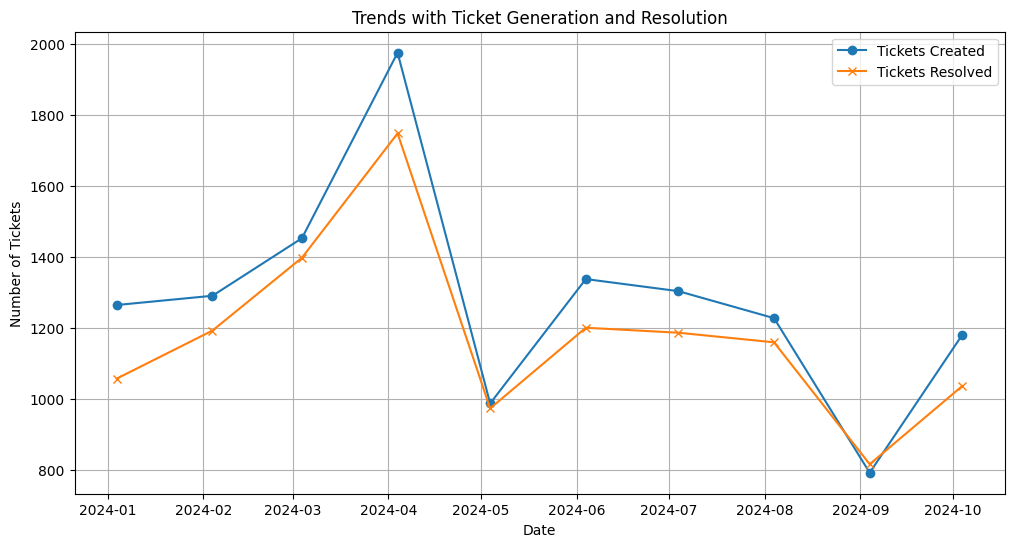

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/content/Task Data.xlsx"  # update this path with the actual path
data = pd.read_excel(file_path)

# Convert date and time columns to datetime objects
data['Created DateTime'] = pd.to_datetime(data['Created Date'] + ' ' + data['Created Time'], errors='coerce')
data['First Response DateTime'] = pd.to_datetime(data['Created Date'] + ' ' + data['First Response Time'], errors='coerce')
data['Resolved DateTime'] = pd.to_datetime(data['Resolved Date'] + ' ' + data['Resolved Time'], errors='coerce')

# Calculate FRT and ART
data['FRT'] = (data['First Response DateTime'] - data['Created DateTime']).dt.total_seconds() / 3600  # in hours
data['ART'] = (data['Resolved DateTime'] - data['Created DateTime']).dt.total_seconds() / 3600  # in hours

# Group data by date to count the number of tickets created and resolved each day
tickets_by_date = data.groupby('Created Date').size().reset_index(name='Tickets Created')
resolved_by_date = data.groupby('Resolved Date').size().reset_index(name='Tickets Resolved')

# Merge the dataframes on date
ticket_trends = pd.merge(tickets_by_date, resolved_by_date, left_on='Created Date', right_on='Resolved Date', how='outer').fillna(0)

# Combine 'Created Date' and 'Resolved Date' into a single 'Date' column
ticket_trends['Date'] = pd.to_datetime(ticket_trends['Created Date'].combine_first(ticket_trends['Resolved Date']), errors='coerce')

# Drop the original date columns
ticket_trends = ticket_trends[['Date', 'Tickets Created', 'Tickets Resolved']]

# Sort by date
ticket_trends = ticket_trends.sort_values(by='Date').reset_index(drop=True)

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(ticket_trends['Date'], ticket_trends['Tickets Created'], marker='o', label='Tickets Created')
plt.plot(ticket_trends['Date'], ticket_trends['Tickets Resolved'], marker='x', label='Tickets Resolved')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Trends with Ticket Generation and Resolution')
plt.legend()
plt.grid(True)
plt.show()


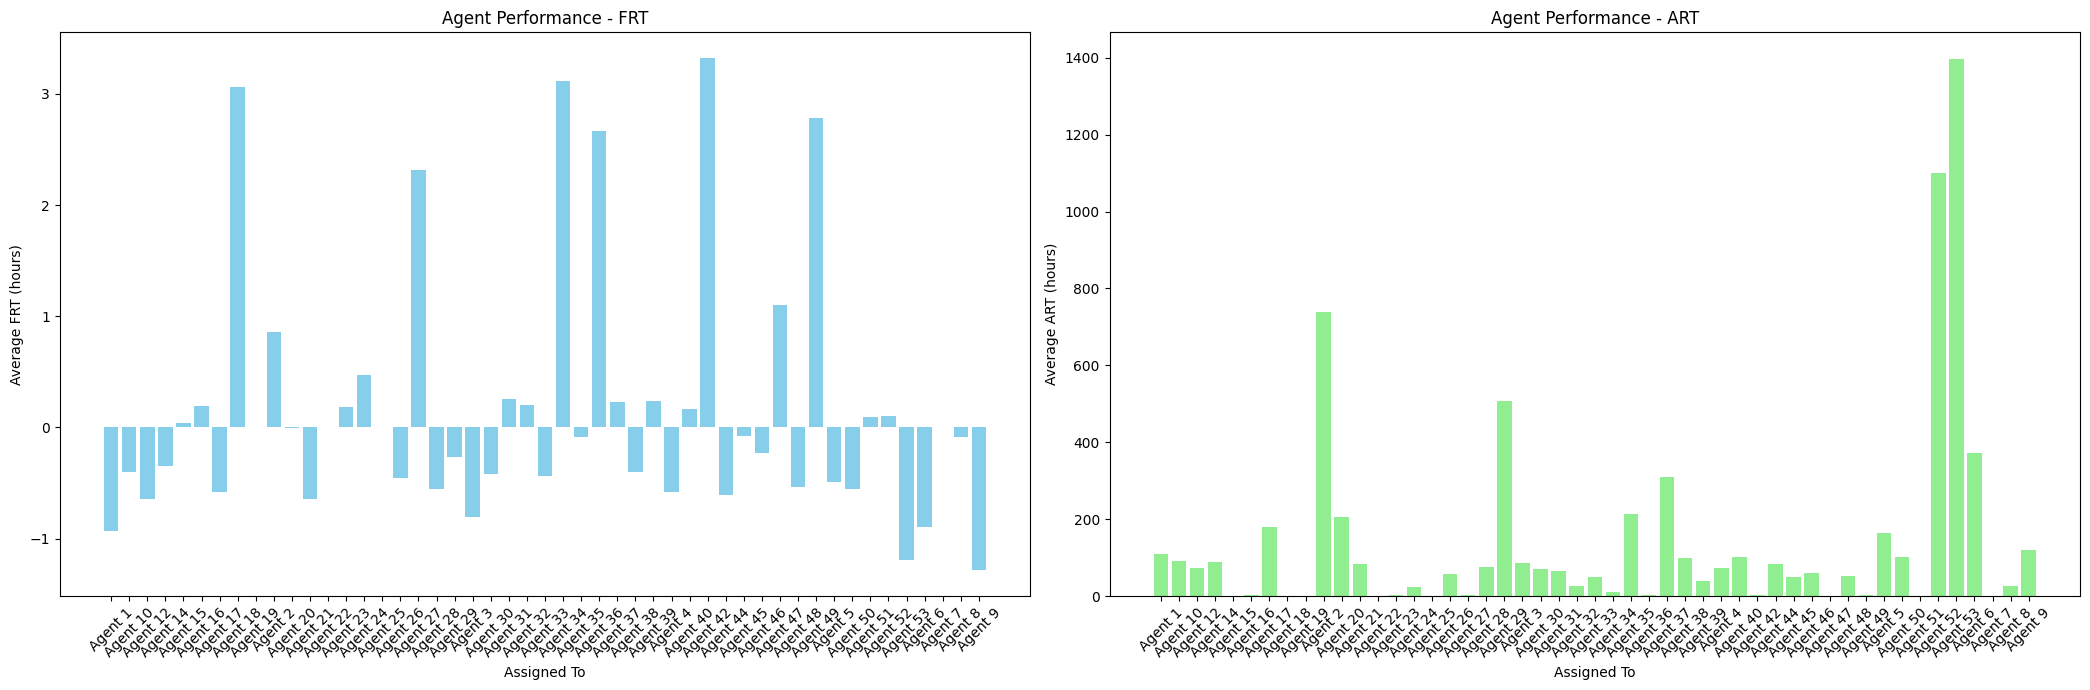

In [2]:
# Group by agent to calculate average FRT and ART
agent_performance = data.groupby('Assigned To')[['FRT', 'ART']].mean().reset_index()

# Plot agent performance
plt.figure(figsize=(21, 7))

# Plot FRT
plt.subplot(1, 2, 1)
plt.bar(agent_performance['Assigned To'], agent_performance['FRT'], color='skyblue')
plt.xlabel('Assigned To')
plt.ylabel('Average FRT (hours)')
plt.title('Agent Performance - FRT')
plt.xticks(rotation=45)

# Plot ART
plt.subplot(1, 2, 2)
plt.bar(agent_performance['Assigned To'], agent_performance['ART'], color='lightgreen')
plt.xlabel('Assigned To')
plt.ylabel('Average ART (hours)')
plt.title('Agent Performance - ART')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


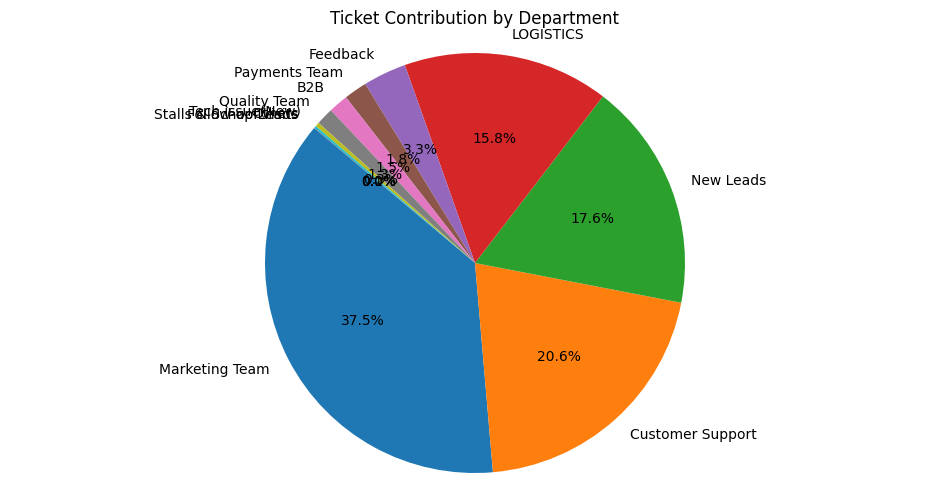

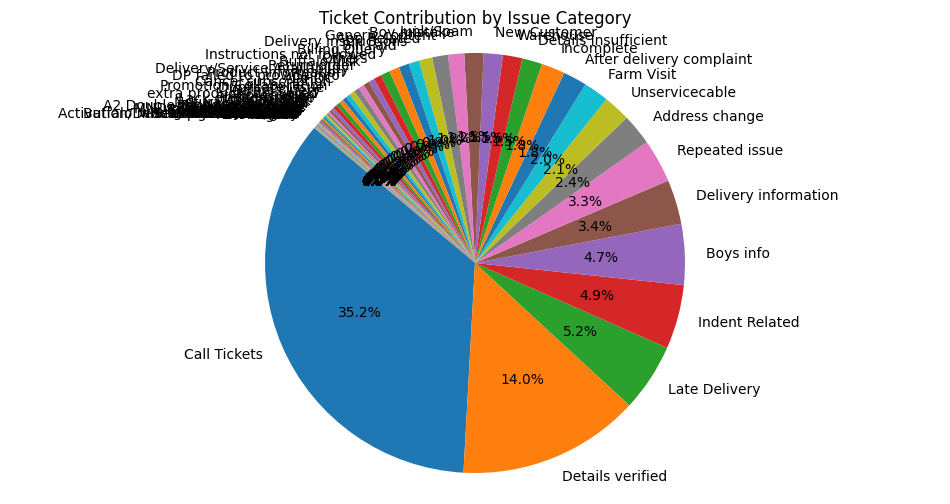

In [3]:
# Calculate ticket count and percentage for each department
department_contribution = data['Department'].value_counts().reset_index()
department_contribution.columns = ['Department', 'Ticket Count']
department_contribution['Percentage'] = (department_contribution['Ticket Count'] / len(data)) * 100

# Plot department contribution
plt.figure(figsize=(12, 6))
plt.pie(department_contribution['Ticket Count'], labels=department_contribution['Department'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Ticket Contribution by Department')
plt.show()

# Calculate ticket count and percentage for each issue category
issue_contribution = data['Issue Category'].value_counts().reset_index()
issue_contribution.columns = ['Issue Category', 'Ticket Count']
issue_contribution['Percentage'] = (issue_contribution['Ticket Count'] / len(data)) * 100

# Plot issue category contribution
plt.figure(figsize=(12, 6))
plt.pie(issue_contribution['Ticket Count'], labels=issue_contribution['Issue Category'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Ticket Contribution by Issue Category')
plt.show()


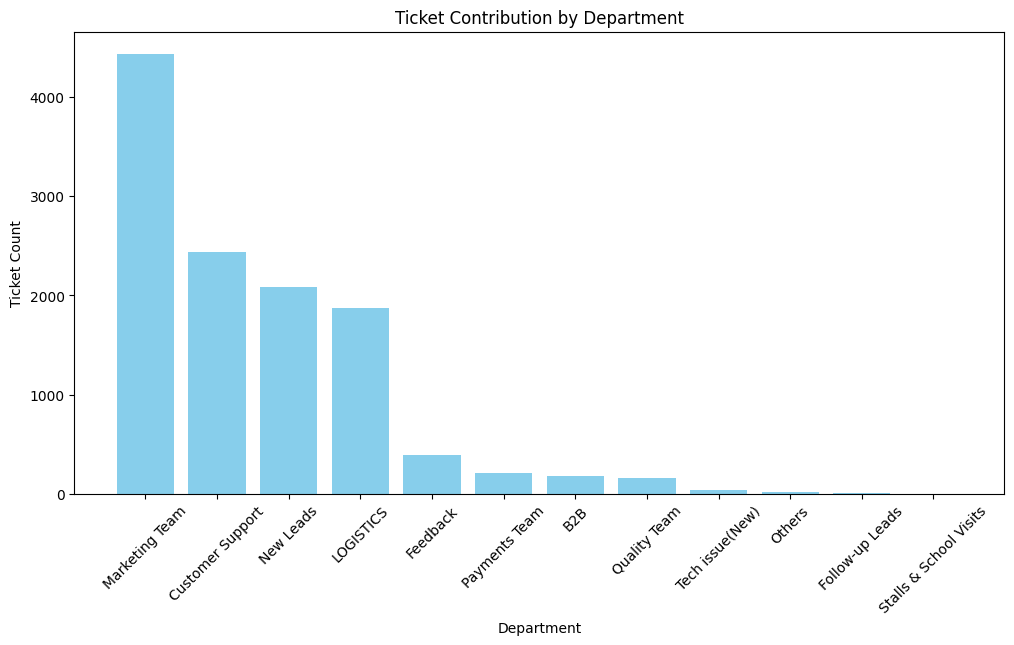

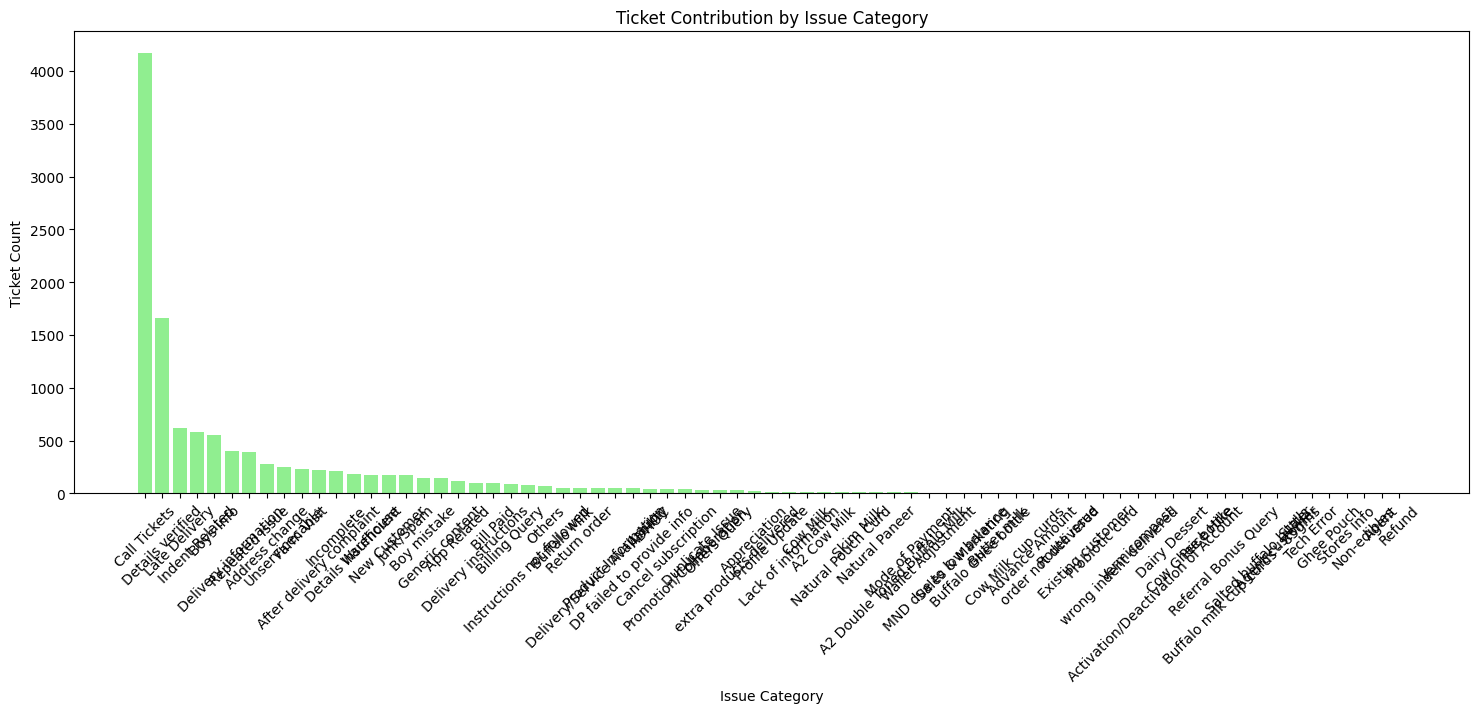

In [4]:
# Calculate ticket count and percentage for each department
department_contribution = data['Department'].value_counts().reset_index()
department_contribution.columns = ['Department', 'Ticket Count']
department_contribution['Percentage'] = (department_contribution['Ticket Count'] / len(data)) * 100

# Plot department contribution using bar chart
plt.figure(figsize=(12, 6))
plt.bar(department_contribution['Department'], department_contribution['Ticket Count'], color='skyblue')
plt.xlabel('Department')
plt.ylabel('Ticket Count')
plt.title('Ticket Contribution by Department')
plt.xticks(rotation=45)
plt.show()

# Calculate ticket count and percentage for each issue category
issue_contribution = data['Issue Category'].value_counts().reset_index()
issue_contribution.columns = ['Issue Category', 'Ticket Count']
issue_contribution['Percentage'] = (issue_contribution['Ticket Count'] / len(data)) * 100

# Plot issue category contribution using bar chart
plt.figure(figsize=(18, 6))
plt.bar(issue_contribution['Issue Category'], issue_contribution['Ticket Count'], color='lightgreen')
plt.xlabel('Issue Category')
plt.ylabel('Ticket Count')
plt.title('Ticket Contribution by Issue Category')
plt.xticks(rotation=45)
plt.show()


Columns in dept_trends: Index(['B2B_Created', 'Customer Support_Created', 'Feedback_Created',
       'Follow-up Leads_Created', 'LOGISTICS_Created',
       'Marketing Team_Created', 'New Leads_Created', 'Others_Created',
       'Payments Team_Created', 'Quality Team_Created',
       'Stalls & School Visits', 'Tech issue(New)_Created', 'B2B_Resolved',
       'Customer Support_Resolved', 'Feedback_Resolved', 'LOGISTICS_Resolved',
       'Marketing Team_Resolved', 'New Leads_Resolved', 'Others_Resolved',
       'Payments Team_Resolved', 'Quality Team_Resolved',
       'Tech issue(New)_Resolved', 'Follow-up Leads_Resolved', 'Date'],
      dtype='object', name='Department')
Skipping Stalls & School Visits due to missing columns


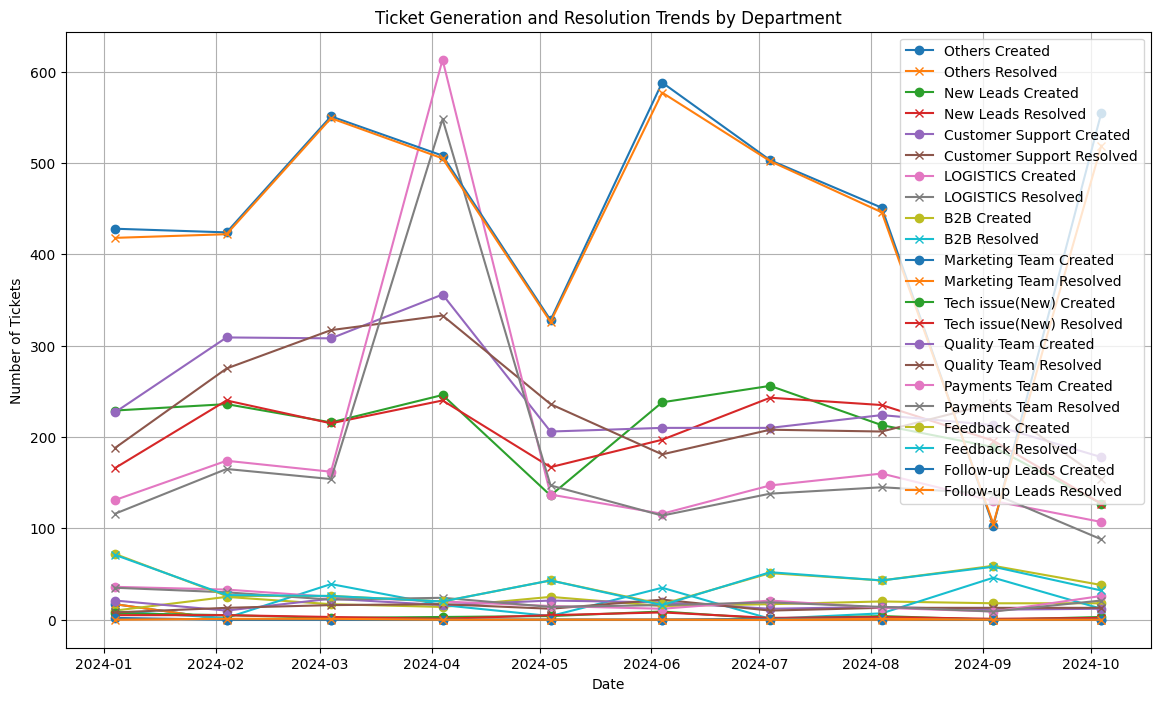

Columns in issue_trends: Index(['A2 Cow Milk_Created', 'A2 Double Toned Buffalo Milk_Created',
       'ADHOC_Created', 'Activation/Deactivation of Account_Created',
       'Address change_Created', 'Advance Amount_Created',
       'After delivery complaint_Created', 'Agent_Created',
       'Agent customer_Created', 'App Related_Created',
       ...
       'Butter milk_Resolved', 'Tech Error_Resolved', 'Vermicompost_Resolved',
       'wrong indent delivered_Resolved', 'Ghee Pouch_Resolved',
       'Stores Info_Resolved', 'Agent_Resolved',
       'Buffalo Ghee bottle_Resolved', 'Non-edibles_Resolved', 'Date'],
      dtype='object', name='Issue Category', length=145)
Skipping Stalls due to missing columns
Skipping Refund due to missing columns


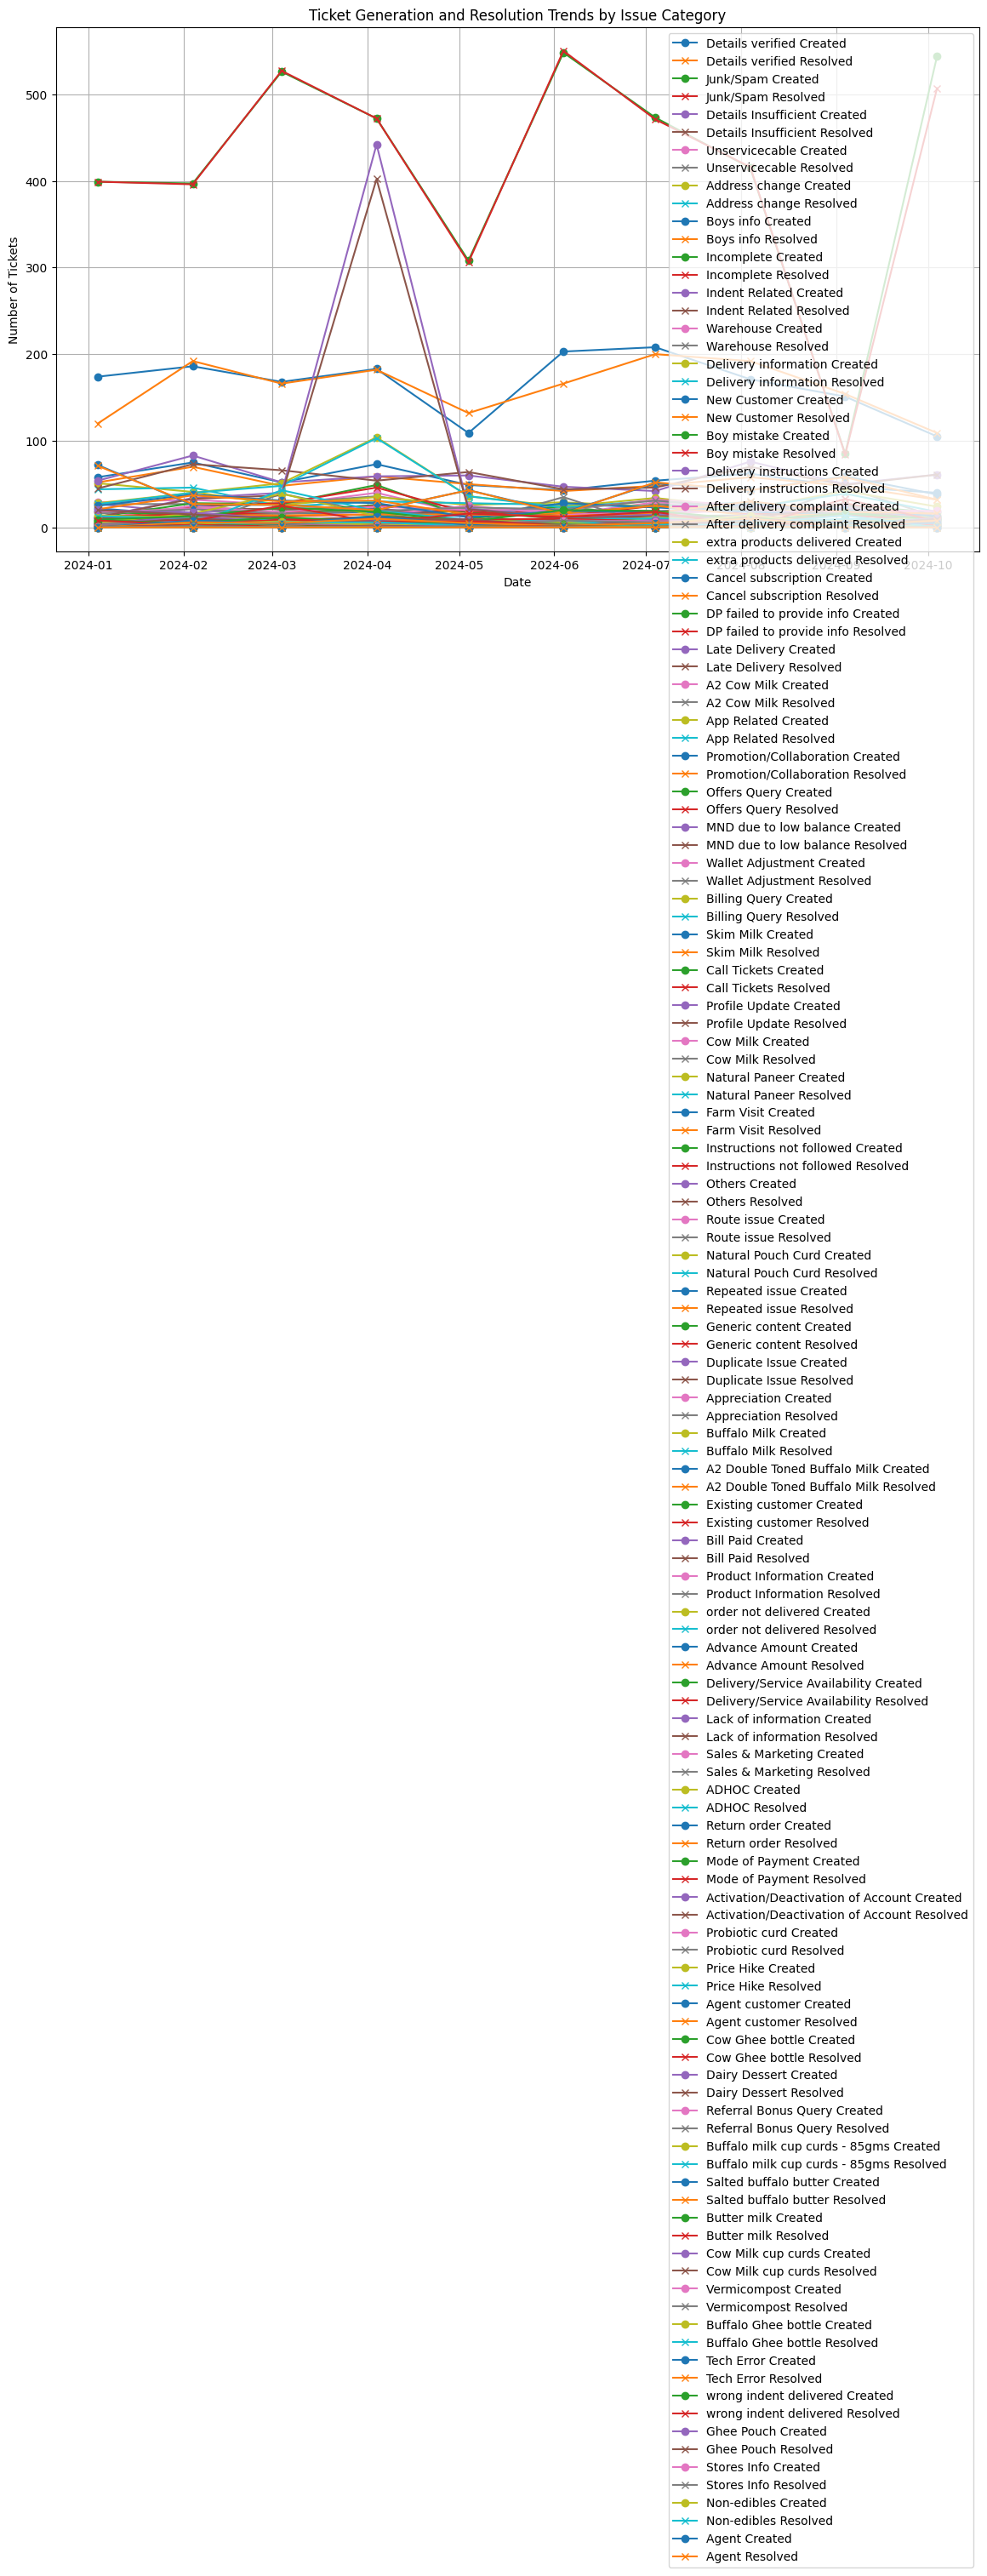

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data

# Group by date and department to count the number of tickets created and resolved
tickets_by_dept_date = data.groupby(['Created Date', 'Department']).size().unstack(fill_value=0).reset_index()
resolved_by_dept_date = data.groupby(['Resolved Date', 'Department']).size().unstack(fill_value=0).reset_index()

# Merge the dataframes on date
dept_trends = pd.merge(tickets_by_dept_date, resolved_by_dept_date, left_on='Created Date', right_on='Resolved Date', how='outer', suffixes=('_Created', '_Resolved')).fillna(0)

# Combine 'Created Date' and 'Resolved Date' into a single 'Date' column
dept_trends['Date'] = pd.to_datetime(dept_trends['Created Date'].combine_first(dept_trends['Resolved Date']), errors='coerce')

# Drop the original date columns
dept_trends = dept_trends.drop(columns=['Created Date', 'Resolved Date'])

# Sort by date
dept_trends = dept_trends.sort_values(by='Date').reset_index(drop=True)

# Debugging step: Check the columns of dept_trends
print("Columns in dept_trends:", dept_trends.columns)

# Filter out NaN values from the 'Department' column
unique_departments = data['Department'].dropna().unique()

# Plot department trends
plt.figure(figsize=(14, 8))
for dept in unique_departments:
    created_col = dept + '_Created'
    resolved_col = dept + '_Resolved'
    if created_col in dept_trends.columns and resolved_col in dept_trends.columns:
        plt.plot(dept_trends['Date'], dept_trends[created_col], marker='o', label=f'{dept} Created')
        plt.plot(dept_trends['Date'], dept_trends[resolved_col], marker='x', label=f'{dept} Resolved')
    else:
        print(f"Skipping {dept} due to missing columns")

plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Ticket Generation and Resolution Trends by Department')
plt.legend()
plt.grid(True)
plt.show()

# Repeat similar steps for Issue Category
tickets_by_issue_date = data.groupby(['Created Date', 'Issue Category']).size().unstack(fill_value=0).reset_index()
resolved_by_issue_date = data.groupby(['Resolved Date', 'Issue Category']).size().unstack(fill_value=0).reset_index()

# Merge the dataframes on date
issue_trends = pd.merge(tickets_by_issue_date, resolved_by_issue_date, left_on='Created Date', right_on='Resolved Date', how='outer', suffixes=('_Created', '_Resolved')).fillna(0)

# Combine 'Created Date' and 'Resolved Date' into a single 'Date' column
issue_trends['Date'] = pd.to_datetime(issue_trends['Created Date'].combine_first(issue_trends['Resolved Date']), errors='coerce')

# Drop the original date columns
issue_trends = issue_trends.drop(columns=['Created Date', 'Resolved Date'])

# Sort by date
issue_trends = issue_trends.sort_values(by='Date').reset_index(drop=True)

# Debugging step: Check the columns of issue_trends
print("Columns in issue_trends:", issue_trends.columns)

# Filter out NaN values from the 'Issue Category' column
unique_issues = data['Issue Category'].dropna().unique()

# Plot issue category trends
plt.figure(figsize=(14, 8))
for issue in unique_issues:
    created_col = issue + '_Created'
    resolved_col = issue + '_Resolved'
    if created_col in issue_trends.columns and resolved_col in issue_trends.columns:
        plt.plot(issue_trends['Date'], issue_trends[created_col], marker='o', label=f'{issue} Created')
        plt.plot(issue_trends['Date'], issue_trends[resolved_col], marker='x', label=f'{issue} Resolved')
    else:
        print(f"Skipping {issue} due to missing columns")

plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Ticket Generation and Resolution Trends by Issue Category')
plt.legend()
plt.grid(True)
plt.show()


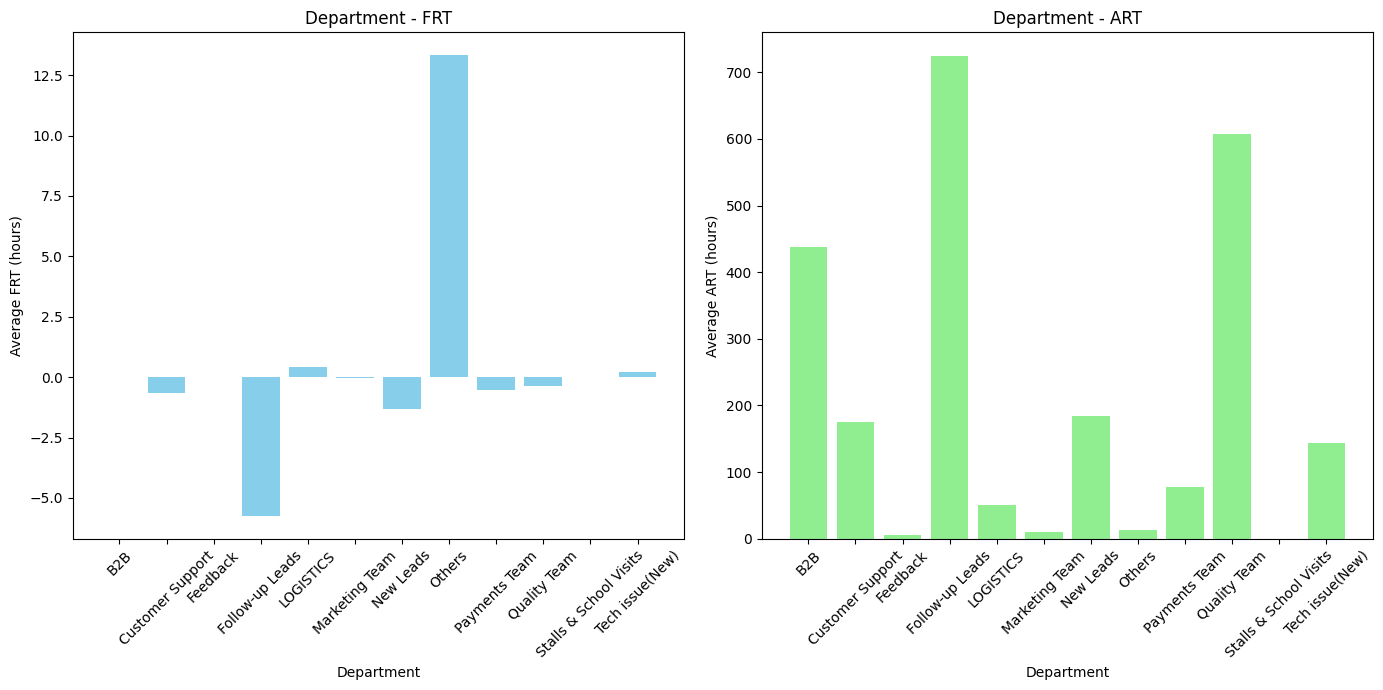

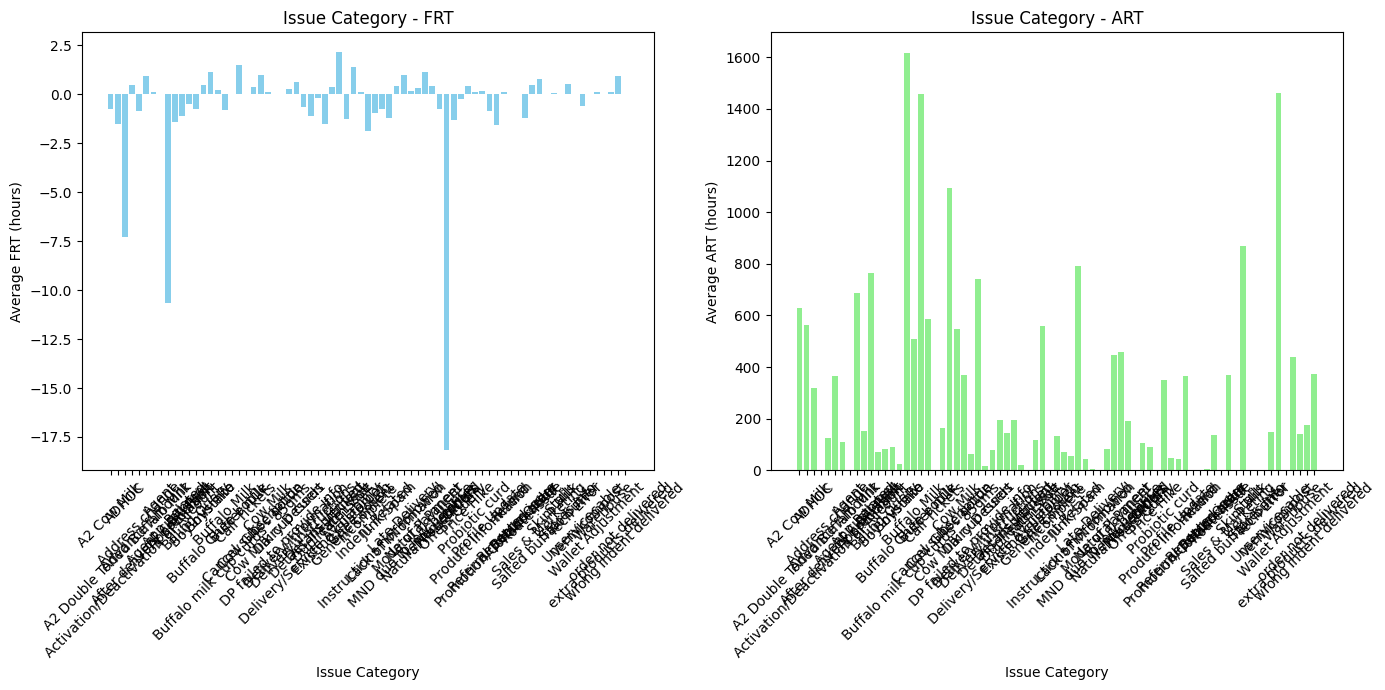

In [6]:


# Calculate average FRT and ART for each department
dept_frt_art = data.groupby('Department')[['FRT', 'ART']].mean().reset_index()

# Plot department FRT and ART
plt.figure(figsize=(14, 7))

# Plot FRT
plt.subplot(1, 2, 1)
plt.bar(dept_frt_art['Department'], dept_frt_art['FRT'], color='skyblue')
plt.xlabel('Department')
plt.ylabel('Average FRT (hours)')
plt.title('Department - FRT')
plt.xticks(rotation=45)

# Plot ART
plt.subplot(1, 2, 2)
plt.bar(dept_frt_art['Department'], dept_frt_art['ART'], color='lightgreen')
plt.xlabel('Department')
plt.ylabel('Average ART (hours)')
plt.title('Department - ART')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate average FRT and ART for each issue category
issue_frt_art = data.groupby('Issue Category')[['FRT', 'ART']].mean().reset_index()

# Plot issue category FRT and ART
plt.figure(figsize=(14, 7))

# Plot FRT
plt.subplot(1, 2, 1)
plt.bar(issue_frt_art['Issue Category'], issue_frt_art['FRT'], color='skyblue')
plt.xlabel('Issue Category')
plt.ylabel('Average FRT (hours)')
plt.title('Issue Category - FRT')
plt.xticks(rotation=45)

# Plot ART
plt.subplot(1, 2, 2)
plt.bar(issue_frt_art['Issue Category'], issue_frt_art['ART'], color='lightgreen')
plt.xlabel('Issue Category')
plt.ylabel('Average ART (hours)')
plt.title('Issue Category - ART')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()